In [137]:
import numpy as np
import matplotlib.pyplot as plt

def parseData():
    with open('C:\\Users\\saich\\Desktop\\UnsupervisedML\\Datasets\\AP_train.txt', 'r', encoding="utf8") as text:
        AuthorDetails=[]
        VenueDetails=[]
        PublicationDetails=[]
        lines=text.readlines()
        for line in lines:
            if '#index' in line[:8]:
                PublicationDetails.append(line[7:].rstrip())
            elif '#c' in line[:2]:
                VenueDetails.append(line[3:].rstrip())
            elif '#@' in line[:2]:
                for column in line[3:].rsplit(";"):
                    AuthorDetails.append(column.rstrip().lower())     
    return PublicationDetails,AuthorDetails,VenueDetails

# After parsing the data for necessary variables we will perform general data mining and data visualizations across the dataset

In [138]:
PublicationDetails,AuthorDetails,VenueDetails=parseData()
print("Count of Distinct Authors:" + str(len(set(AuthorDetails)))) 
print("Count of Distinct Venues:" + str(len(set(VenueDetails))-1))
print("Count of Distinct Publications:" + str(len(set(PublicationDetails)))) 

Count of Distinct Authors:1465859
Count of Distinct Venues:255685
Count of Distinct Publications:1976815


The below code obtains citations per publication which is stored in publiNCitations

In [139]:
publiNCitations = {}
with open('C:\\Users\\saich\\Desktop\\UnsupervisedML\\Datasets\\AP_train.txt', 'r', encoding="utf8") as text :
    lines=text.readlines()
    for line in lines:
        if '#%' in line:
            if publiNCitations.get(line[3:].rstrip()) == None:
                publiNCitations[line[3:].rstrip()] = 1
            else:
                publiNCitations[line[3:].rstrip()] += 1

The below code obtains references per publication which is stored in publiNReferences

In [140]:
publiNReferences = {}
with open('C:\\Users\\saich\\Desktop\\UnsupervisedML\\Datasets\\AP_train.txt', 'r', encoding="utf8") as text :
    lines=text.readlines()
    for line in lines:
        if '#index' in line:
            pub_id = line[7:].rstrip()
        elif '#%' in line:
            if publiNReferences.get(pub_id) == None:
                publiNReferences[pub_id] = 1
            else:
                publiNReferences[pub_id] += 1 

The below code obtains citations per venue which is stored in venueNCitations

In [288]:
venueNCitations = {}
with open('C:\\Users\\saich\\Desktop\\UnsupervisedML\\Datasets\\AP_train.txt', 'r', encoding="utf8") as text :
    lines=text.readlines()
    for line in lines: 
        if '#c' in line:
             venue_id = line[3:].rstrip()
        elif '#%' in line:
            if venueNCitations.get(venue_id) == None:
                venueNCitations[venue_id] = 1
            else:
                venueNCitations[venue_id] += 1

In [146]:
print("Total Citations :" , sum(publiNCitations.values()))

total citations : 7250330


# 1.b.

In [150]:
MatchedValues = [s for s in VenueDetails if "Principles and Practice of Knowledge Discovery in Databases" in s]

In [151]:
set(MatchedValues)

{'Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)',
 'Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)',
 "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases",
 'PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases',
 "PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases"}

All the above publications are of the same journal but of different year hence they do not count as separate, but due to the year 
value in the string we get them as separate items.

# 1.c.

In [154]:
from collections import Counter
authorCounts = Counter(AuthorDetails)

In [155]:
authorCountsDict = dict(authorCounts)
authorCountsDictKeys = list(authorCountsDict.keys())
authorCountsDictValues = list(authorCountsDict.values())

In [157]:
authorCountsDictValues.pop(1)

42176

In [158]:
authorCountsDictValues

[48,
 61,
 7,
 17,
 356,
 34,
 8,
 1,
 4,
 2,
 1,
 56,
 9,
 59,
 99,
 1,
 1,
 46,
 1,
 9,
 4,
 61,
 204,
 157,
 145,
 165,
 2,
 6,
 18,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 10,
 3,
 1,
 26,
 57,
 4,
 1,
 6,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 33,
 73,
 5,
 2,
 1,
 1,
 13,
 46,
 1,
 38,
 35,
 55,
 1,
 49,
 15,
 4,
 12,
 8,
 17,
 70,
 23,
 28,
 6,
 15,
 17,
 234,
 8,
 26,
 1,
 1,
 2,
 135,
 1,
 70,
 1,
 1,
 1,
 1,
 1,
 177,
 3,
 4,
 50,
 6,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 40,
 28,
 12,
 2,
 1,
 2,
 43,
 3,
 3,
 2,
 2,
 3,
 4,
 1,
 1,
 1,
 47,
 26,
 14,
 1,
 1,
 7,
 9,
 31,
 7,
 1,
 2,
 20,
 5,
 26,
 4,
 140,
 130,
 7,
 5,
 2,
 158,
 5,
 36,
 12,
 6,
 36,
 4,
 10,
 38,
 35,
 251,
 44,
 38,
 1,
 20,
 15,
 15,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 36,
 10,
 47,
 1,
 1,
 1,
 2,
 54,
 177,
 8,
 11,
 18,
 11,
 27,
 1,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 133,
 19,
 150,
 57,
 22,
 2,
 3,
 18,
 10,
 1,
 42,
 64,
 1,
 1,
 1,
 58,
 8,
 8,
 1,
 55,
 106,
 36,
 35,
 104,
 

In [159]:
plt.hist(authorCountsDictValues,bins = 20,log=True)

(array([  1.45851000e+06,   5.67200000e+03,   1.09400000e+03,
          3.18000000e+02,   1.25000000e+02,   5.60000000e+01,
          4.30000000e+01,   1.50000000e+01,   7.00000000e+00,
          3.00000000e+00,   9.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  1.00000000e+00,   5.36500000e+01,   1.06300000e+02,
          1.58950000e+02,   2.11600000e+02,   2.64250000e+02,
          3.16900000e+02,   3.69550000e+02,   4.22200000e+02,
          4.74850000e+02,   5.27500000e+02,   5.80150000e+02,
          6.32800000e+02,   6.85450000e+02,   7.38100000e+02,
          7.90750000e+02,   8.43400000e+02,   8.96050000e+02,
          9.48700000e+02,   1.00135000e+03,   1.05400000e+03]),
 <a list of 20 Patch objects>)

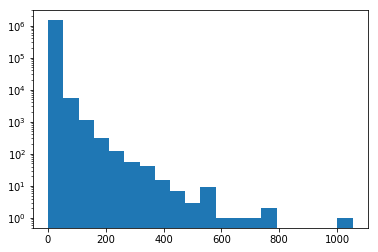

In [160]:
plt.show()

# 1.d

In [161]:
meanOfAuthors = np.mean(authorCountsDictValues)
standardDeviationOfAuthors = np.std(authorCountsDictValues)
firstQuartile = np.percentile(authorCountsDictValues, 25, axis=0)
median = np.percentile(authorCountsDictValues, 50, axis=0)
thirdQuartile = np.percentile(authorCountsDictValues, 75, axis=0)
minValue = min(authorCountsDictValues)
maxValue = max(authorCountsDictValues)

meanOfAuthors

3.3206981849537951

In [163]:
standardDeviationOfAuthors

8.9128853807227202

In [164]:
firstQuartile

1.0

In [165]:
median

1.0

In [166]:
maxValue

1054

In [167]:
minValue

1

In [172]:
thirdQuartile

2.0

median value is 1.0 whereas mean is 3.32, hence we can say from standard deviation and Q3 that the magnitudes of points increases very rapidly as the points move right.

# 1.e.

In [173]:
VenueDetails
venueCleaned = VenueDetails
from collections import Counter
venueCleanedCounts = Counter(venueCleaned)

In [174]:
venueCleanedCountsDict = dict(venueCleanedCounts)
venueCleanedCountsDictKeys = list(venueCleanedCountsDict.keys())
venueCleanedCountsDictValues = list(venueCleanedCountsDict.values())

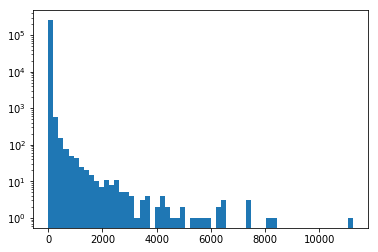

In [177]:
plt.hist(venueCleanedCountsDictValues,bins = 60,log=True)
plt.show()

In [178]:
meanOfVenues = np.mean(venueCleanedCountsDictValues)
standardDeviationOfVenues = np.std(venueCleanedCountsDictValues)
firstQuartile = np.percentile(venueCleanedCountsDictValues, 25, axis=0)
median = np.percentile(venueCleanedCountsDictValues, 50, axis=0)
thirdQuartile = np.percentile(venueCleanedCountsDictValues, 75, axis=0)
minValue = min(venueCleanedCountsDictValues)
maxValue = max(venueCleanedCountsDictValues)

meanOfVenues

7.7314166594964133

In [179]:
standardDeviationOfVenues

83.381056103575318

In [180]:
firstQuartile

1.0

In [181]:
median

1.0

In [182]:
thirdQuartile

1.0

In [183]:
minValue

1

In [72]:
maxValue

11227

In [184]:
max(venueCleanedCountsDict, key=venueCleanedCountsDict.get)

'IEEE Transactions on Information Theory'

# 1.F.

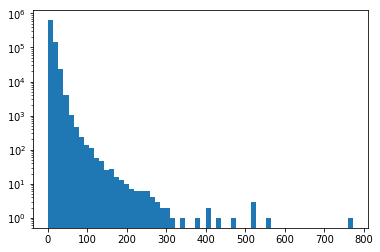

In [185]:
referencesValues = list(publiNReferences.values())
referencesKeys=list(publiNReferences.keys())


plt.hist(referencesValues,bins = 60,log=True)
plt.show()

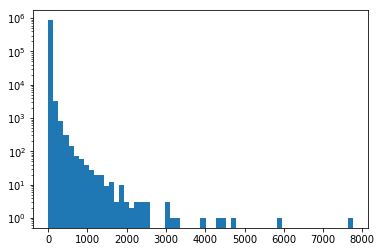

In [186]:
citationValues = list(publiNCitations.values())
citationKeys=list(publiNCitations.keys())


plt.hist(citationValues,bins = 60,log=True)
plt.show()

In [187]:
max(publiNCitations,key = publiNCitations.get)

'408396'

In [188]:
max(publiNReferences,key = publiNReferences.get)

'719353'

# 1.G.

In [292]:
for i in venueCleanedCountsDictKeys:
    if venueNCitations.get(str(i)) == None:
        venueNCitations[str(i)] = 1

In [293]:
impactPerVenue = {}
for i in venueCleanedCountsDictKeys:
    impactPerVenue[str(i)] = (venueNCitations.get(str(i)))/venueCleanedCountsDict.get(str(i))

In [286]:
venueCleanedCountsDictKeys

['Linux Journal',
 'Integration, the VLSI Journal',
 'International Journal of Parallel Programming',
 'The computer comes of age',
 'Information Sciences: an International Journal',
 'Journal of the ACM (JACM)',
 'Computability with Pascal',
 'Information and Control',
 'Computing',
 'Software engineering with MODULA-2 and ADA',
 'Computers and Artificial Intelligence',
 'SIAM Journal on Applied Mathematics',
 'Up and running: the small business computer implementation cookbook',
 'Proc. IFIP working conference on Programming Languages and System Design',
 'ADA: Concurrent Programming',
 'Computers, Data Processing, and The Law',
 'IEEE Transactions on Software Engineering',
 'Communications of the ACM',
 'on Automata, languages and programming',
 'Register Allocation in Optimizing Compilers',
 'Polymorphic programming languages: design and implementation',
 'Analysis of speedup in distributed algorithms',
 'Automated microcode synthesis',
 'ACM Transactions on Computer Systems (TOCS)

In [241]:
impactPerVenueList = list(impactPerVenue.values())

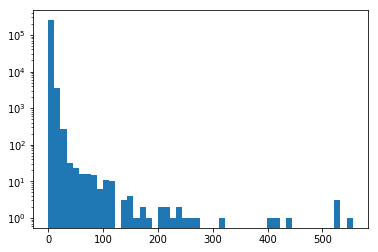

In [271]:
plt.hist(impactPerVenueList,bins = 50,log=True)
plt.show()

In [264]:
import operator
sorted_x = sorted(impactPerVenue.items(), key=operator.itemgetter(1),reverse=True)

In [265]:
sorted_x

[('System-on-Chip Test Architectures: Nanometer Design for Testability',
  555.0),
 ('Human-centered visualization environments', 527.0),
 ('Algorithms for memory hierarchies: advanced lectures', 524.0),
 ('Reconfigurable Computing: The Theory and Practice of FPGA-Based Computation',
  523.0),
 ('Algorithm engineering: bridging the gap between algorithm theory and practice',
  435.0),
 ('Visualization in Medicine: Theory, Algorithms, and Applications', 412.0),
 ('Agent-oriented programming: from prolog to guarded definite clauses',
  408.0),
 ('No Code Required: Giving Users Tools to Transform the Web', 311.0),
 ('Networked Graphics: Building Networked Games and Virtual Environments',
  273.0),
 ('HCI Beyond the GUI: Design for Haptic, Speech, Olfactory, and Other Nontraditional Interfaces',
  264.0),
 ('Information Assurance: Dependability and Security in Networked Systems',
  245.0),
 ('Building Intelligent Interactive Tutors: Student-centered strategies for revolutionizing e-learnin

Hence, maximum impact value is 555.0

In [287]:
sorted(venueNCitations.items(), key=operator.itemgetter(1),reverse=True)

[('Expert Systems with Applications: An International Journal', 64583),
 ('Theoretical Computer Science', 46266),
 ('Information Sciences: an International Journal', 44534),
 ('IEEE Transactions on Computers', 40724),
 ('Pattern Recognition', 39724),
 ('Computer Communications', 38533),
 ('Journal of Computational Physics', 38242),
 ('Proceedings of the SIGCHI Conference on Human Factors in Computing Systems',
  31163),
 ('IEEE Transactions on Pattern Analysis and Machine Intelligence', 29318),
 ('Electronic Notes in Theoretical Computer Science (ENTCS)', 29139),
 ('Neurocomputing', 28863),
 ('Computer Networks: The International Journal of Computer and Telecommunications Networking',
  28371),
 ('ACM Computing Surveys (CSUR)', 28361),
 ('IEEE Transactions on Knowledge and Data Engineering', 28065),
 ('Pattern Recognition Letters', 26788),
 ('IEEE Transactions on Parallel and Distributed Systems', 26280),
 ('Journal of Systems and Software', 26191),
 ('IEEE Transactions on Software Eng

# H

In [270]:
#Venue with the highest impact factor:
sorted_x[0]

('System-on-Chip Test Architectures: Nanometer Design for Testability', 555.0)

# I

In [272]:
impactPerVenue1 = {}
for i in venueCleanedCountsDictKeys:
    if venueCleanedCountsDict.get(str(i)) >= 10:
        impactPerVenue1[str(i)] = (venueNCitations.get(str(i)))/venueCleanedCountsDict.get(str(i))

In [282]:
impactPerVenue1List = list(impactPerVenue1.values())

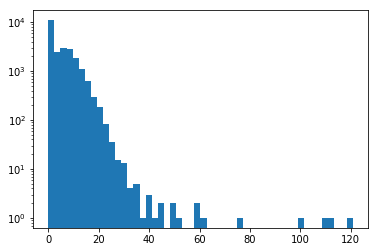

In [283]:
plt.hist(impactPerVenue1List,bins = 50,log=True)
plt.show()

# 2 Association Rules

In [230]:
import sys
pathOfData = input("Enter data file path:")
variables_list = []

file = open("kosarak.arff", "w") 
 
file.write("@RELATION kosarak\n") 
for i in range(0,41270):
    file.write("@ATTRIBUTE j" + str(i) + " {0, 1}\n" )
file.write("@DATA\n")

with open(pathOfData) as f:
    line = f.readline()
    while line:
        temp = "{"
        variables_list = line.strip("\n").split()
        variables_list = list(map(int, variables_list))
        variables_list = set(variables_list)
        variables_list = sorted(variables_list)

        for i in variables_list:
            temp += str(int(i-1)) + " 1, "
        temp = temp[:(len(temp)-2)] + "}"

        file.write(temp)
        line = f.readline()

file.close()

Enter data file path:C:\\Users\\saich\\Desktop\\UnsupervisedML\\kosarak.dat


It took about 19 seconds to convert from .dat file to .arff file.

It took nearly 11 seconds to load the file to Weka.

Run 1- 5
Run 2- 4
Run 3- 5
Run 4- 6
Run 5- 6

Average = 5 seconds

Average time is very less when compared to time taken for conversion and upload into weka.

FPGrowth found 2 rules (displaying top 2)

1. [i11=1, i218=1, i148=1]: 50098 ==> [i6=1]: 49866   <conf:(1)> lift:(1.64) lev:(0.02) conv:(84.4) 
2. [i11=1, i148=1]: 55759 ==> [i6=1]: 55230   <conf:(0.99)> lift:(1.63) lev:(0.02) conv:(41.3) 


# Parsing 20NG and MNIST data to perform KNN

Importing necessary libraries

In [64]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from scipy import sparse
from numpy import linalg as LA
import numpy as np
import pandas as pd
import mnist
import scipy.misc

In [ ]:
20 Newgroup necessary parsing

In [69]:
vectorizer = CountVectorizer()

#acquiring the complete data
completeNgData = fetch_20newsgroups(subset='all')
completeNGParsed = vectorizer.fit_transform(completeNgData.data)

#acquiring the training data 
trainNgData = fetch_20newsgroups(subset='train')
trainNGParsed = vectorizer.fit_transform(trainNgData.data)

#acquiring the test data
testNgData = fetch_20newsgroups(subset='test')
testNGParsed = vectorizer.fit_transform(testNgData.data)

#Finding similarity matrices for complete dataset
#Here, distance metrics used are cosine distance and euclidean distance
completeCSDistance = cosine_similarity(completeNGParsed)
completeEuclideanDistance = euclidean_distances(completeNGParsed, completeNGParsed)


#Finding similarity matrices for train dataset
#Here, distance metrics used are cosine distance and euclidean distance
#trainCSDistance = cosine_similarity(trainNGParsed)
#trainEuclideanDistance = euclidean_distances(trainNGParsed, trainNGParsed)

#Finding similarity matrices for test dataset
#Here, distance metrics used are cosine distance and euclidean distance
#testCSDistance = cosine_similarity(testNGParsed)
#testEuclideanDistance = euclidean_distances(testNGParsed, testNGParsed)


MNIST data parsing and similarity matrix calculation

In [114]:
#Acquiring the necessary inputs
Train_X = mnist.train_images()
Test_X = mnist.test_images()
Train_Y = mnist.train_labels()
Test_Y = mnist.test_labels()

#Because of the huge size of mnist data, computing similarities for complete data is very tedious. 
#By doing stratified sampling we can make sure that the population magnitudes of each group are still conserved in the 
#output sample data
sampledTrain_X, sampledTest_X, sampledTrain_Y, sampledTest_Y = train_test_split(
    Test_X, Test_Y, train_size=.2, stratify = Test_Y)

#X data obtained is in 3 dimensions, hence inorder to make computation feasible we change it to 2
finalTrain_X = sampledTrain_X.reshape((sampledTrain_X.shape[0], sampledTrain_X.shape[1] * sampledTrain_X.shape[2]))
#Due to the computational capabilities available the similarity matrix calculation will be done on sampled training
#dataset
trainCosineSimilarityMatrix = cosine_similarity(finalTrain_X)
trainEuclideanMatrix = euclidean_distances(finalTrain_X)

finalTest_X = sampledTest_X.reshape((sampledTest_X.shape[0], sampledTest_X.shape[1] * sampledTest_X.shape[2]))

#The complete data after reshaping can be obtained as follows
TotalData = np.concatenate((finalTrain_X,finalTest_X),axis = 0)

C:\Users\saich\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [115]:
finalTrain_X.shape

(2000, 784)

In [117]:
finalTest_X.shape

(8000, 784)

In [118]:
#Similarity matrices for complete dataset can be obtained as follows
totalDataCSDistance = cosine_similarity(TotalData)
totalDataEuclideanDIstance = euclidean_distances(TotalData)

K Nearest Neighbors

In [97]:
def KNearestNeighbors(D,idx,k,sim):
    indexOfNeighbors = []
    if (D == "cosine"):
        indexOfNeighbors = list(np.argsort(sim[idx])[-(k+1):])
        indexOfNeighbors.remove(idx)
    elif (D == "euclidean"):
        indexOfNeighbors = list(np.argsort(sim[idx])[:(k+1)])
        indexOfNeighbors.remove(idx)
    predns = {}
    TBD = completeNgData.target
    TBDLabel = completeNgData.target_names
    Acc = 0
    for i in indexOfNeighbors:
        pred = TBDLabel[TBD[i]]
        if(predns.get(pred) == None):
            predns[pred] = 1
        else:
            predns[pred] += 1
    return (max(predns, key=predns.get))

The below code snippet helps to understand that the output label of a random index matches with its actual label

In [87]:
neighbors_list = KNearestNeighbors("cosine",12960,6,completeCSDistance)

[10078, 6172, 2662, 7647, 11195, 15268]


In [88]:
neighbors_list

'misc.forsale'

In [89]:
completeNgData.target_names[completeNgData.target[12960]]

'misc.forsale'

In [105]:
def CalculateAccuracy():
    Acc = 0
    for i in range(11315,18846):
        PredLabels = KNearestNeighbors("cosine", i, 6, completeCSDistance)
        if (PredLabels == completeNgData.target_names[completeNgData.target[i]]):
            Acc += 1
    return Acc/7531

In [106]:
A = CalculateAccuracy()

In [107]:
A

0.5993891913424512

Hence, we have obtained an accuracy of 59% for 20 NG data using KNN

# For MNIST Data

In [ ]:
TY = np.concatenate((sampledTrain_Y,sampledTest_Y),axis = 0) 

In [129]:
def KNearestNeighborsMNIST(D,idx,k,sim):
    indexOfNeighbors = []
    if (D == "cosine"):
        indexOfNeighbors = list(np.argsort(sim[idx])[-(k+1):])
        indexOfNeighbors.remove(idx)
    elif (D == "euclidean"):
        indexOfNeighbors = list(np.argsort(sim[idx])[:(k+1)])
        indexOfNeighbors.remove(idx)
    predns = {}
    Acc = 0
    for i in indexOfNeighbors:
        pred = TY[i]
        if(predns.get(pred) == None):
            predns[pred] = 1
        else:
            predns[pred] += 1
    return (max(predns, key=predns.get))

In [130]:
TY.shape

(10000,)

In [131]:
TY[4699]

7

In [134]:
def CalculateAccuracy():
    Acc = 0
    for i in range(2001,10000):
        PredLabels = KNearestNeighborsMNIST("cosine", i, 9, totalDataCSDistance)
        if (PredLabels == TY[i]):
            Acc += 1
    return Acc/7999

In [135]:
AccMNIST = CalculateAccuracy()

In [136]:
AccMNIST

0.9562445305663207

Hence, the accuracy obtained is 95.6% on MNIST dataset using KNN